## The purpose of this notebook is to take random contacts and assign them to cities according to the population of those cities.

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from random import choices

import warnings
warnings.filterwarnings('ignore')  #set to ignore or default

#read the data file for cites
path = '../data/uscitiesv1.4.csv'
citiesDF = pd.read_csv(path)
#print("df shape:", df.shape)

#read the data file for contacts
path = '../data/contacts1.csv'
contactsDF = pd.read_csv(path)
print("\nThis cell loads the contacts in contactsDF and cities in citiesDF")
print("citiesDF shape:", citiesDF.shape, "\tcontactsDF shape: ", contactsDF.shape)
contactsDF


This cell loads the contacts in contactsDF and cities in citiesDF
citiesDF shape: (36651, 16) 	contactsDF shape:  (896, 4)


,FirstName,LastName,MobilePhone,email
0,Adam,Bergnaum,990-717-6872,Adam95@example.com
1,Julia,Krajcik,253-390-6538,Julia_Krajcik92@example.com
2,Aimee,Runolfsdottir,064-313-1136,Aimee73@example.com
3,Ericka,McCullough,297-886-4531,Ericka15@example.com
4,Wilmer,Powlowski,361-341-6124,Wilmer.Powlowski92@example.com
5,Jon,Schmitt,950-261-0525,Jon_Schmitt93@example.com
6,Linnea,Armstrong,324-850-2826,Linnea_Armstrong51@example.com
7,Joseph,Abshire,099-857-2723,Joseph_Abshire3@example.com
8,Ethel,Koelpin,987-983-7242,Ethel_Koelpin19@example.com
9,Olen,Schoen,289-534-9409,Olen_Schoen44@example.com


In [3]:
df2 =  citiesDF.loc[citiesDF['population'] > 100].sort_values(by=['population'],ascending=False)
cityIndex = df2.index.values
population = df2['population'].values
print("This cell creates two arrays: one for the cityIndex and one for the population")
print("They will be used to select a weighted random city for each of the contacts")

This cell creates two arrays: one for the cityIndex and one for the population
They will be used to select a weighted random city for each of the contacts


In [4]:

#choices(cityIndex,population)  will pick from the cityIndex array based on the weight of population

# create an array of cities, one for each contact 
arr = []
for x in range (0,len(contactsDF)):
    arr.append(choices(cityIndex,population))
# convert array to data frame    df['index1'] = df.index
randomCityDf = pd.DataFrame(arr, columns=['cityId'])

#make common keys
randomCityDf['key'] = randomCityDf.index
contactsDF['key'] = contactsDF.index

#merge the contact data fram with the randomCity Dataframe based on the index of the contacts
mdf1 = pd.merge(contactsDF,randomCityDf,how='left',on='key')

df4 = df2[['city','state_id','county_name','lat','lng','population','density']]
df4.insert(0,'cityId',df4.index)
contactsDF

,FirstName,LastName,MobilePhone,email,key
0,Adam,Bergnaum,990-717-6872,Adam95@example.com,0
1,Julia,Krajcik,253-390-6538,Julia_Krajcik92@example.com,1
2,Aimee,Runolfsdottir,064-313-1136,Aimee73@example.com,2
3,Ericka,McCullough,297-886-4531,Ericka15@example.com,3
4,Wilmer,Powlowski,361-341-6124,Wilmer.Powlowski92@example.com,4
5,Jon,Schmitt,950-261-0525,Jon_Schmitt93@example.com,5
6,Linnea,Armstrong,324-850-2826,Linnea_Armstrong51@example.com,6
7,Joseph,Abshire,099-857-2723,Joseph_Abshire3@example.com,7
8,Ethel,Koelpin,987-983-7242,Ethel_Koelpin19@example.com,8
9,Olen,Schoen,289-534-9409,Olen_Schoen44@example.com,9


In [5]:

output = pd.merge(mdf1,df4)
#csvOutput = output.sort_values('key_0').to_csv(index=False)
csvOutput = output.sort_values('LastName').to_csv(index=False)
#csvOutput = output.to_csv(index=False)

contactsFile = open("contacts.csv","w")
contactsFile.write(csvOutput)
output


,FirstName,LastName,MobilePhone,email,key,cityId,city,state_id,county_name,lat,lng,population,density
0,Adam,Bergnaum,990-717-6872,Adam95@example.com,0,12359,New York,NY,New York,40.6943,-73.9249,19164071.0,10934.0
1,Karley,Berge,825-755-9940,Karley_Berge@example.com,41,12359,New York,NY,New York,40.6943,-73.9249,19164071.0,10934.0
2,Darrel,Roob,990-601-3157,Darrel70@example.com,52,12359,New York,NY,New York,40.6943,-73.9249,19164071.0,10934.0
3,Gerhard,Cummings,010-550-4338,Gerhard84@example.com,121,12359,New York,NY,New York,40.6943,-73.9249,19164071.0,10934.0
4,Antonio,Larson,739-406-9034,Antonio_Larson@example.com,122,12359,New York,NY,New York,40.6943,-73.9249,19164071.0,10934.0
5,Dianna,Wunsch,157-013-4184,Dianna.Wunsch@example.com,127,12359,New York,NY,New York,40.6943,-73.9249,19164071.0,10934.0
6,Rudolph,Morissette,485-572-6394,Rudolph19@example.com,150,12359,New York,NY,New York,40.6943,-73.9249,19164071.0,10934.0
7,Alf,Raynor,589-753-2093,Alf_Raynor13@example.com,182,12359,New York,NY,New York,40.6943,-73.9249,19164071.0,10934.0
8,Brenda,Will,003-418-2646,Brenda.Will@example.com,240,12359,New York,NY,New York,40.6943,-73.9249,19164071.0,10934.0
9,Seth,Dickinson,919-766-2951,Seth.Dickinson90@example.com,280,12359,New York,NY,New York,40.6943,-73.9249,19164071.0,10934.0


In [6]:
summary = output.groupby(by="city").size().reset_index(name='counts')
summary.sort_values('counts',ascending=False)

,city,counts
236,Los Angeles,39
275,New York,35
80,Chicago,27
195,Houston,23
251,Miami,13
18,Atlanta,12
99,Dallas,12
305,Philadelphia,12
352,San Diego,11
343,Sacramento,11


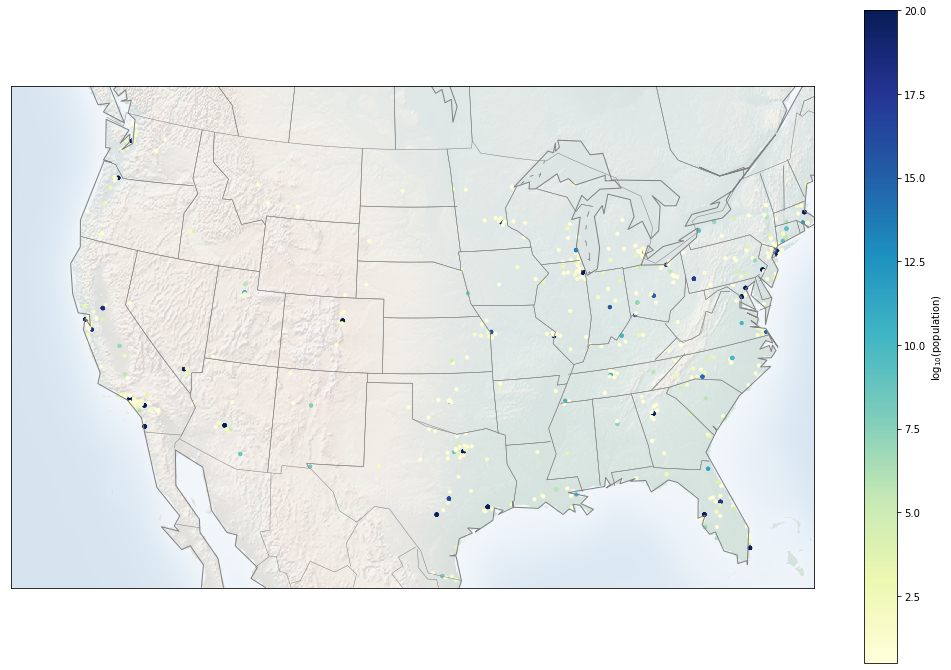

In [7]:
import mpl_toolkits
from mpl_toolkits.basemap import Basemap


#contacts
contacts = output
lat = contacts['lat'].values
lon = contacts['lng'].values
population = contacts['population'].values
area = contacts['density'].values

# 1. Draw the map background
fig = plt.figure(figsize=(18, 12))
m = Basemap(projection='lcc', resolution='c', 
            lat_0=39.0, lon_0=-100,
            width=4.8E6, height=3E6)
m.shadedrelief(alpha=0.3)
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')



# 2. scatter city data, with color reflecting population and size reflecting area

m.scatter(lon, lat, latlon=True,
          #c=np.log10(population), s=area,
          #c=np.log10(population), s=8,
          c=population/100000, s=10,
          cmap='YlGnBu', alpha=1.0)

# 3. create colorbar and legend
plt.colorbar(label=r'$\log_{10}({\rm population})$')
plt.clim(0.5, 20)


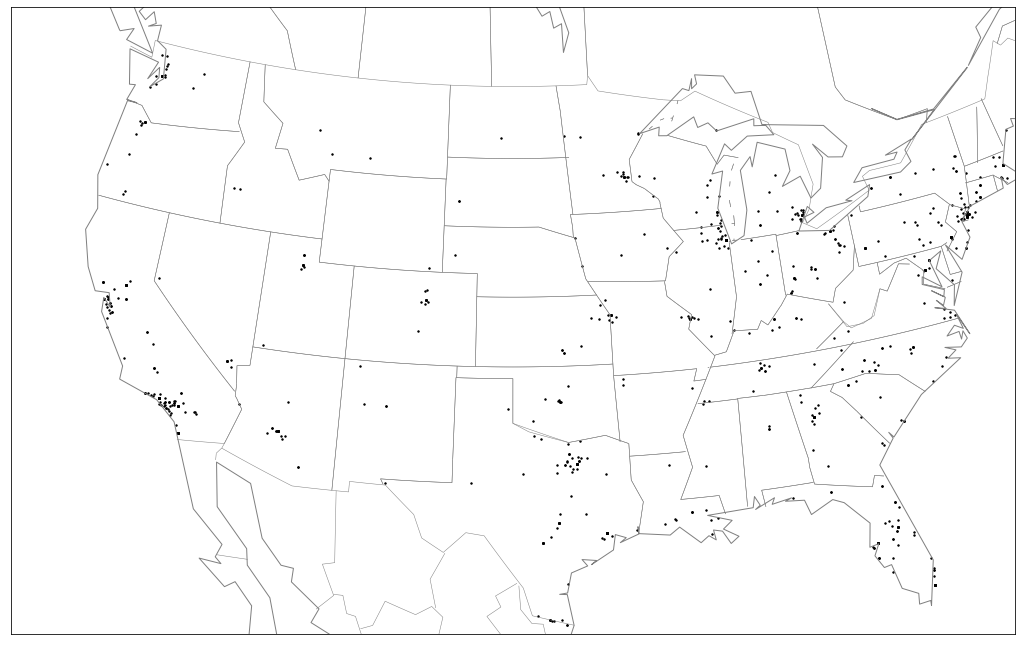

In [10]:
# 1. Draw the map background
fig2 = plt.figure(figsize=(18, 12))
m2 = Basemap(projection='lcc', resolution='c', 
            lat_0=39.0, lon_0=-100,
            width=4.8E6, height=3E6)
m2.drawcoastlines(color='gray')
m2.drawcountries(color='gray')
m2.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m2.scatter(lon, lat, latlon=True,
          #c=np.log10(population), s=area,
          c='black', s=2)

In [12]:
from sklearn import cluster

# reduce data frame to just lat and long and convert to an array
dk = contacts[['lat','lng']].values 

k_means2 = cluster.KMeans(n_clusters=12)
k_means2.fit(dk)
#print(k_means2.labels_[::1])
assignment_arr = k_means2.labels_
centers_arr = k_means2.cluster_centers_
print('assignments:\n', assignment_arr)
print('centers:\n',centers_arr)


assignments:
 [ 3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  8  8  8  8  8  8  8  3  3  3  3  3  3
  3  3  3  3  3  3  0  3  3  3  3  3  3  3  3  3  3 10 10  5  6  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  8  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 11  3  1  1  1  1  1
  1  1  1  1  1  1 11 11 11 11 11 11 11 11 11 11 11 11  8  8  2  2  2  2
  2  2  2  6 10 10  3  0 11  3  9  9  9  9  9  9  0  0  0  0  0  0  5  5
  3  1  1  1  6  5  5  5  5  5  5  0  0  0  6  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  5  6  3  6  3  1  2 11
 11  0  0  3  8  9  6  0  0  0  0  0  0  0  0  0  0  0  0 10 10 10 10 10
 10  9  0  6  6  6  0 11 11 11  1  6  9  9  9  9  9  9  3  1  3 11  3 10
 10 10  6  3  3  3  3  3  3  3  3  3  6  8  3  2 11  1  1  1  1  1  1  1
  1  1  9  4  4  4  4  4  4  4  5 11 

In [20]:
#columns name
columns_new = ['cluster_id']

#created the data frame
assign_df = pd.DataFrame(assignment_arr, columns=columns_new)
#assign_df 

#join the old data frame d6, with the new assignment data frame
df7 = pd.concat([contacts,assign_df], axis=1, join_axes=[contacts.index])
#df7.dtypes

#now Lets Make a DF for the centers . , lat is 40
center_columns_new = ['lat', 'lng']
df_centers = pd.DataFrame(centers_arr,columns=center_columns_new)
df_centers.index.values

df7

,FirstName,LastName,MobilePhone,email,key,cityId,city,state_id,county_name,lat,lng,population,density,cluster_id
0,Adam,Bergnaum,990-717-6872,Adam95@example.com,0,12359,New York,NY,New York,40.6943,-73.9249,19164071.0,10934.0,3
1,Karley,Berge,825-755-9940,Karley_Berge@example.com,41,12359,New York,NY,New York,40.6943,-73.9249,19164071.0,10934.0,3
2,Darrel,Roob,990-601-3157,Darrel70@example.com,52,12359,New York,NY,New York,40.6943,-73.9249,19164071.0,10934.0,3
3,Gerhard,Cummings,010-550-4338,Gerhard84@example.com,121,12359,New York,NY,New York,40.6943,-73.9249,19164071.0,10934.0,3
4,Antonio,Larson,739-406-9034,Antonio_Larson@example.com,122,12359,New York,NY,New York,40.6943,-73.9249,19164071.0,10934.0,3
5,Dianna,Wunsch,157-013-4184,Dianna.Wunsch@example.com,127,12359,New York,NY,New York,40.6943,-73.9249,19164071.0,10934.0,3
6,Rudolph,Morissette,485-572-6394,Rudolph19@example.com,150,12359,New York,NY,New York,40.6943,-73.9249,19164071.0,10934.0,3
7,Alf,Raynor,589-753-2093,Alf_Raynor13@example.com,182,12359,New York,NY,New York,40.6943,-73.9249,19164071.0,10934.0,3
8,Brenda,Will,003-418-2646,Brenda.Will@example.com,240,12359,New York,NY,New York,40.6943,-73.9249,19164071.0,10934.0,3
9,Seth,Dickinson,919-766-2951,Seth.Dickinson90@example.com,280,12359,New York,NY,New York,40.6943,-73.9249,19164071.0,10934.0,3


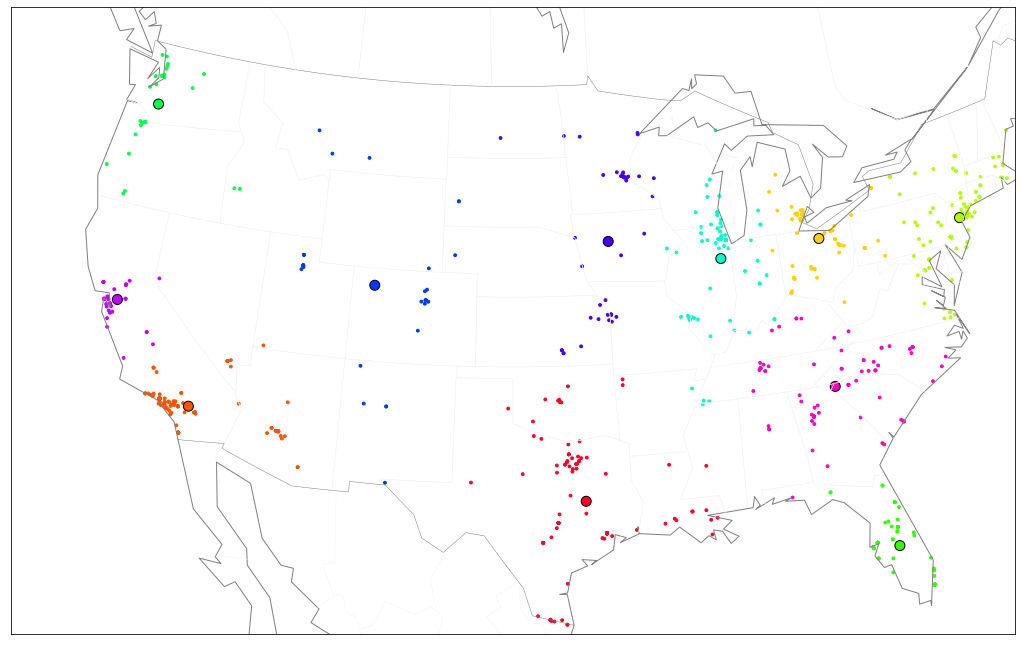

In [21]:
# 1. Draw the map background
fig3 = plt.figure(figsize=(18, 12))
m3 = Basemap(projection='lcc', resolution='c', 
            lat_0=39.0, lon_0=-100,
            width=4.8E6, height=3E6)
m3.drawcoastlines(color='gray')
m3.drawcountries(color='gray')
m3.drawstates(color='#F3F3F3')

lat3 = df7['lat'].values
lon3 = df7['lng'].values
cluster3 = df7['cluster_id'].values

# 2. scatter city data, with color reflecting population
m3.scatter(lon3, lat3, latlon=True,
          #c=np.log10(population), s=area,
            cmap='gist_rainbow', alpha=1.0,
          c=cluster3, s=8)

m3.scatter(df_centers['lng'].values, df_centers['lat'].values, latlon=True, 
           cmap='gist_rainbow', s=100, c=df_centers.index, edgecolors='Black')